In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import shapiro

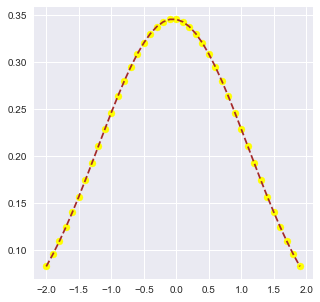

In [2]:
def   pdf(x):
    mean=np.mean(x)
    std=np.std(x)
    y_out=1/(std*np.sqrt(2*np.pi))* np.exp(-(x-mean)**2/(2*std**2))
    return y_out

# to generate an array of x
x=np.arange(-2,2,0.1)
y=pdf(x)

# Plotting the normal curve/bell curve or normal distribution

plt.style.use("seaborn")
plt.figure(figsize=(5,5))

plt.plot(x,y, color="brown", linestyle="dashed")

plt.scatter(x,y, marker="o", color="yellow")


# Steps for checking Normal distribution
_Note: (ye sirf numeric variables ke distribution check krne k lea hoti hai)_
* Import dataset
* subset the dataset
* visualization
  1. Histogram
  2. quantile-quantile-norm plot(qq-normplot)
* statistical test to check normality
  1. Shapiro Wilk test
  2. D'Agostino test
  3. Anderson's Darling test


In [3]:
#import dataset

kashti=sns.load_dataset("titanic")
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# taking subsets
kashti=kashti[["sex","age","fare"]]
kashti

,sex,age,fare
0,male,22.0,7.2500
1,female,38.0,71.2833
2,female,26.0,7.9250
3,female,35.0,53.1000
4,male,35.0,8.0500
...,...,...,...
886,male,27.0,13.0000
887,female,19.0,30.0000
888,female,NaN,23.4500
889,male,26.0,30.0000


<AxesSubplot:xlabel='age', ylabel='Count'>

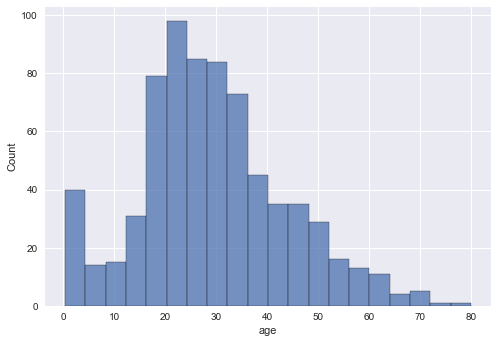

In [5]:
# Histogram
sns.histplot(kashti["age"])

<AxesSubplot:xlabel='fare', ylabel='Count'>

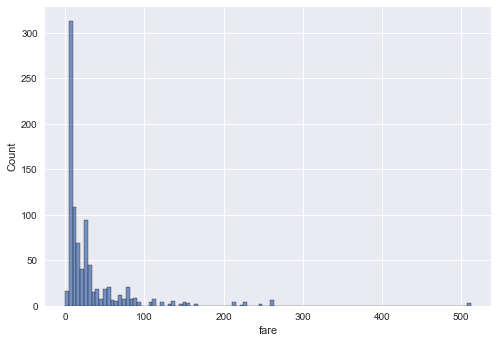

In [6]:
sns.histplot(kashti["fare"])

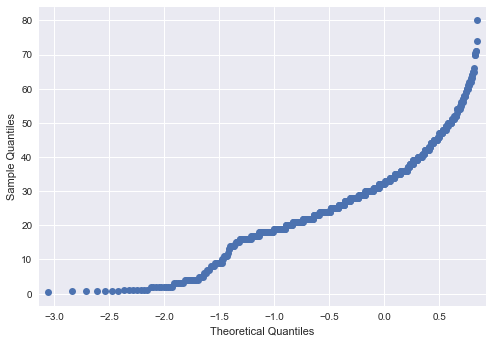

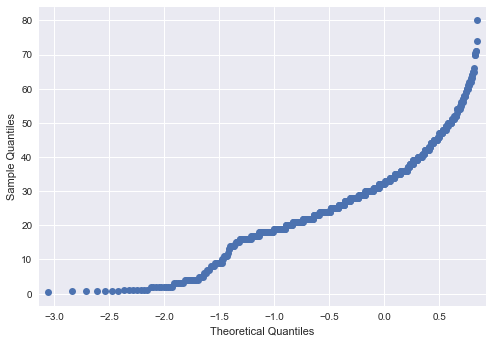

In [7]:
# quantile-quantile plot
from statsmodels.graphics.gofplots import qqplot
qqplot(kashti["age"])

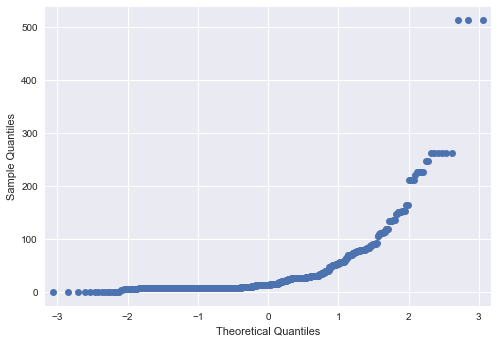

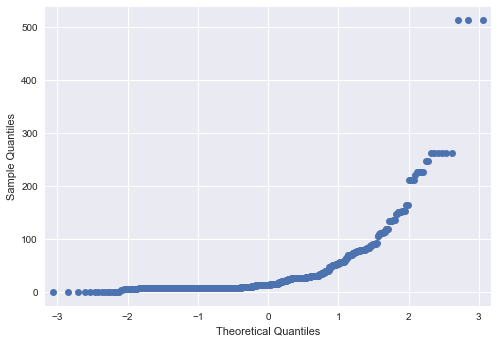

In [8]:
qqplot(kashti["fare"])

# Normality
  There are many statistical tests that we can use to quantify

  whether a group of sample data looks as though it was drawn

  from gaussian distribution

  Each test makes diffierent assumptions and considers diffrent concepts of data.

  We will look at 3 commonly used tests that we apply to our sample

  1. Shapiro Wilk test
  2. D'Agustino's K^2 test
  3. Anderson's darling test

>   p < alpha :reject Ho,Not normal
> 
>   p > alpha  :reject Ha,Normal

## 1- Shapiro Wilk Test

whether the sample data has gausssian/normal distribution

 **Assumtions**

 Observations in each sample are independent and identically distributed(iid)

 **Interpretation**

- H0=sample has gaussian/normal distribution
- H1=sample does not have guassian/normal distribution
- 

 # (script of SWT(NT) to apply on any data) 


```
 from scipy.stats import shapiro

 data=["numerical data]
 stat,p=shapiro(data)
 print("stat=",stat)
 print("p=",p)

 if  p > 0.05: 
    print("data is normal")
else:
    print("data is not normal")  


In [9]:
from scipy.stats import shapiro

#Loading dataset
kashti=kashti[["sex","age","fare"]]

# Shapiro on age
stat,p=shapiro(kashti["age"])
print("stat=%.3f" % stat) #Replace , with % to get ans upto 3 decimal digits
print("p=%.3f" % p)


if  p > 0.05: 
    print("data is normal")
else:
    print("data is not normal") 



stat=nan
p=1.000
data is normal


In [10]:
# Shapiro on fare
stat,p=shapiro(kashti["fare"])
print("stat=%.3f" % stat) #Replace , with % to get ans upto 3 decimal digits
print("p=%.3f" % p)


if  p > 0.05: 
    print("data is normal")
else:
    print("data is not normal")  

stat=0.522
p=0.000
data is not normal


# 2. D’Agostino’s K^2 Test

DA test basically gives us summary statistics of the data.

The summary includes kurtosis and skewness, to determine if

the data distribution differs from the normal distribution.

**Skew**

Skew is a quantification of how much a distribution is pushed

left or right, a measure of asymmetry in the distribution.

Skew measures the asymmetry in the distribution.

It quantifies how much distribution is pushed to left or right.
**
Kurtosis**

Kurtosis quantifies how much of the distribution is in the tail. It is a simple and commonly used statistical test for normality.

**Assumptions**

Observations in each sample are independent and identically distributed.

**Interpretation**

H0: the sample has a Gaussian distribution.

H1: the sample does not have a Gaussian distribution.

In [11]:
# D'Agostino and Pearson's Test
from scipy.stats import normaltest
# normality test
stat, p = normaltest(kashti["age"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=nan, p=nan
Sample does not look Gaussian (reject H0)


# 3. Anderson-Darling Test

Anderson-Darling Test is a statistical test that can be used to evaluate

whether a data sample is in Standard Gaussian Distribution or not.

The test is a improved version of nonparametric goodness-of-fit statistical test

i.e. Kolmogorov-Smirnov test.

It can be used to check whether a data sample is normal.

The test is a modified version of a more sophisticated 

nonparametric goodness-of-fit statistical test called the Kolmogorov-Smirnov test.

One of the features of Anderson-Darling test is that it returns

list of critical value other than single p-value hence it provide

us more insights on the final result.

The anderson() SciPy function implements the Anderson-Darling test.

It takes as parameters the data sample and the name of the distribution

to test it against. By default, the test will check against the Gaussian distribution (dist=’norm’)

In [12]:
# Anderson-Darling Test
from scipy.stats import anderson
# normality test
result = anderson(kashti["age"])
print('Statistic: %.3f' % result.statistic)
p = 0
# interpret results
for i in range(len(result.critical_values)):
    slevel, cvalues = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (slevel, cvalues))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (slevel, cvalues))

Statistic: nan
15.000: 0.573, data does not look normal (reject H0)
10.000: 0.653, data does not look normal (reject H0)
5.000: 0.784, data does not look normal (reject H0)
2.500: 0.914, data does not look normal (reject H0)
1.000: 1.087, data does not look normal (reject H0)


# What Test Should You Use?

We have covered a few normality tests, but this is not all of the tests that exist.

So which test do you use?

I recommend using them all on your data, where appropriate.

The question then becomes, how do you interpret the results? What if the tests disagree, which they often will?

I have two suggestions for you to help think about this question.

# Hard Fail

Your data may not be normal for lots of different reasons.

Each test looks at the question of whether a sample was drawn

from a Gaussian distribution from a slightly different perspective.

A failure of one normality test means that your data is not normal.

As simple as that.

You can either investigate why your data is not normal and

perhaps use data preparation techniques to make the data more normal.

Or you can start looking into the use of nonparametric statistical methods

instead of the parametric methods.

# Soft Fail

If some of the methods suggest that the sample is Gaussian

and some not, then perhaps take this as an indication that your data is Gaussian-like.

In many situations, you can treat your data as though it is Gaussian 

and proceed with your chosen parametric statistical methods.